<a href="https://colab.research.google.com/github/ehlatham/PUS2022_ELathamGray/blob/main/HW5/Latham_Gray_Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the programs
import pandas as pd
import pylab as pl
import numpy as np

from sklearn import preprocessing
from sklearn import cluster
from sklearn.cluster import KMeans

pl.rcParams['font.size'] = 18

In [ ]:
!pip install geopandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
     |████████████████████████████████| 6.3 MB 24.6 MB/s 
     |████████████████████████████████| 16.7 MB 40.1 MB/s 


In [ ]:
import geopandas as gpd
import matplotlib.pylab as plt
import time
import os
import urllib
pl.style.use('ggplot')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 9.5 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
#Mounding the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

Choosing the drive 

In [ ]:
cd /content/drive/Shareddrives/PUS2022

/content/drive/Shareddrives/PUS2022


Listing what's in the drive

In [ ]:
ls

 censusapi.txt
 data/
'Heat Vulnerability PUS Midterm Project Proposal Template (1).gdoc'
'Heat Vulnerability PUS Midterm Project Proposal Template.gdoc'
'PUS2022 proposal slide deck.gslides'
'PUS Final Project Template.gdoc'
'PUS Midterm Project Proposal .gdoc'
'PUS Midterm Project Proposal Template.gdoc'
 tl_2019_17_tract/
'Wolk Latham PUS Midterm Project Proposal Written.gdoc'


Listing what's in the data folder

In [ ]:
ls data

'2010 Census Tracts'/
 array_cholera_data.npy
 array_pump_data.npy
 citibike/
 Longitude_Graticules_and_World_Countries_Boundaries-shp/
 natural_earth_vector/
 NYC_Women_s_Resource_Network_Database.csv
 seeds_dataset.gdoc
 seeds_dataset.txt
'SP.POP.TOTL?downloadformat=excel'


In [ ]:
#reading in the data
pop_df = pd.read_excel("data/SP.POP.TOTL?downloadformat=excel", header=3)

In [ ]:
#header
pop_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [ ]:
#seeing what shape it is before hand
pop_df.shape

(266, 65)

In [ ]:
#Cleaning up the data
pop_df_clean = pop_df.dropna(how = 'any')


In [ ]:
#Let's see!
pop_df_clean = pop_df_clean.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)


In [ ]:
#I ran this, it worked, I commented out what I was doing (getting rid of the pesky index) ran it again and it now doesn't work but it still says 262,61
pop_df_clean.set_index("Country Name",inplace=True)

In [ ]:
#yay!!! I got the right shape
pop_df_clean.shape

(262, 61)

In [ ]:
pop_df_clean.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,117468741.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,5803677.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [ ]:
pop_df_clean.tail()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0
"Yemen, Rep.",5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,5816241.0,5907873.0,6001858.0,6097042.0,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
South Africa,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,19888259.0,20406863.0,20942147.0,21496075.0,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
Zambia,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,3681953.0,3797877.0,3918872.0,4045740.0,...,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0
Zimbabwe,3776679.0,3905038.0,4039209.0,4178726.0,4322854.0,4471178.0,4623340.0,4779825.0,4941901.0,5111326.0,...,12894323.0,13115149.0,13350378.0,13586710.0,13814642.0,14030338.0,14236599.0,14438812.0,14645473.0,14862927.0


# Scaling (standardizing)

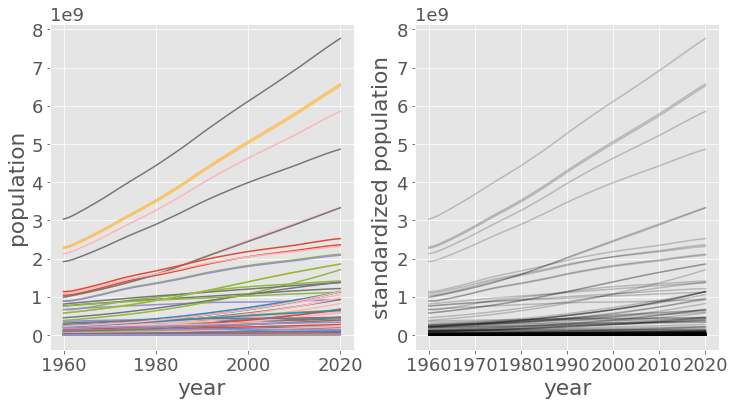

In [ ]:
#prescaling graph, also doesn't look like yours, I'd imagine that the individual lines for any given country depicted
#in the population graph, probably follows the same path in the secound 
fig, ax = pl.subplots(1,2, figsize=(12,6))
pop_df_clean.T.plot(legend=False, ax=ax[0])
ax[1].plot(pop_df_clean.T, color="k", alpha=0.2)

ax[0].set_xlabel("year")
ax[0].set_ylabel("population")
ax[1].set_xlabel("year")
ax[1].set_ylabel("standardized population")
ax[1].set_xticks(range(0,70,10))
ax[1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);

In [ ]:
#I'm following from one of your lectures and wanted to make sure that I was on the right track
pop_df_clean.values

array([[5.42080000e+04, 5.54340000e+04, 5.62340000e+04, ...,
        1.05846000e+05, 1.06310000e+05, 1.06766000e+05],
       [1.30836765e+08, 1.34159786e+08, 1.37614644e+08, ...,
        6.43090131e+08, 6.60046272e+08, 6.77243299e+08],
       [8.99696700e+06, 9.16940600e+06, 9.35144200e+06, ...,
        3.71719220e+07, 3.80417570e+07, 3.89283410e+07],
       ...,
       [1.70998360e+07, 1.75245330e+07, 1.79657330e+07, ...,
        5.77925200e+07, 5.85582670e+07, 5.93086900e+07],
       [3.07078000e+06, 3.16433000e+06, 3.26064500e+06, ...,
        1.73517140e+07, 1.78610340e+07, 1.83839560e+07],
       [3.77667900e+06, 3.90503800e+06, 4.03920900e+06, ...,
        1.44388120e+07, 1.46454730e+07, 1.48629270e+07]])

In [ ]:
pop_df_clean.std(axis=1)

Country Name
Aruba                          1.949524e+04
Africa Eastern and Southern    1.601030e+08
Afghanistan                    9.027728e+06
Africa Western and Central     1.062335e+08
Angola                         8.121128e+06
                                   ...     
Kosovo                         3.068811e+05
Yemen, Rep.                    7.742207e+06
South Africa                   1.297606e+07
Zambia                         4.396429e+06
Zimbabwe                       3.404663e+06
Length: 262, dtype: float64

In [ ]:
pop_df_clean.mean(axis=1)

Country Name
Aruba                          7.676846e+04
Africa Eastern and Southern    3.363310e+08
Afghanistan                    1.869939e+07
Africa Western and Central     2.287737e+08
Angola                         1.413545e+07
                                   ...     
Kosovo                         1.595687e+06
Yemen, Rep.                    1.400506e+07
South Africa                   3.699079e+07
Zambia                         8.775118e+06
Zimbabwe                       9.491677e+06
Length: 262, dtype: float64

In [ ]:
#I'm whitening the data so it can be condenced!
preprocessing.scale(pop_df_clean.values, axis=-1).mean(axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


array([-1.61913978, -1.56181912, -1.50170408, -1.43969378, -1.37836075,
       -1.31803085, -1.25992176, -1.20224331, -1.14513591, -1.08945203,
       -1.03586439, -0.9810315 , -0.92596483, -0.8715929 , -0.81621531,
       -0.76084212, -0.70662203, -0.65478593, -0.60277644, -0.54975759,
       -0.49514485, -0.43996672, -0.3838307 , -0.3282095 , -0.2729292 ,
       -0.21712028, -0.16044867, -0.10268884, -0.04641915,  0.00692108,
        0.05841719,  0.10811149,  0.15399866,  0.20236734,  0.24888859,
        0.29004081,  0.33313174,  0.37625656,  0.41698552,  0.45658628,
        0.49736598,  0.53629682,  0.58202407,  0.6307766 ,  0.68110952,
        0.73273194,  0.78613841,  0.84063309,  0.89716169,  0.95235322,
        1.00559227,  1.05417315,  1.10773287,  1.16378578,  1.22105543,
        1.27886571,  1.33674564,  1.39333539,  1.44974972,  1.50662303,
        1.56175674])

In [ ]:
#I know this is largely the same as the one above, I wanted to see it before I weant and named it
pop_standard = preprocessing.scale(pop_df_clean.values, axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


# Visualize the Data

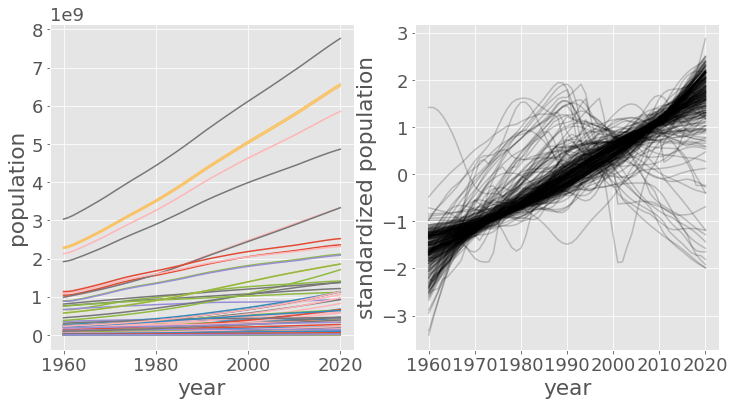

In [ ]:
#Now we can see the varriation in population 
fig, ax = pl.subplots(1,2, figsize=(12,6))
pop_df_clean.T.plot(legend=False, ax=ax[0])
ax[1].plot(pop_standard.T, color="k", alpha=0.2)

ax[0].set_xlabel("year")
ax[0].set_ylabel("population")
ax[1].set_xlabel("year")
ax[1].set_ylabel("standardized population")
ax[1].set_xticks(range(0,70,10))
ax[1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);

# Make a cluster model with KMeans

Use kmeans (sklearn.cluster.KMeans) to cluster the data. Make 9 models for number of clusters = 2, 3, 4, 5, 6, 7, 8, 9, 10

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 8, 10]

In [ ]:
#Here we're able to calculate the inertias of the clusters, w/o having to repeat for 2, 3...
#creating a 'place' for my intertias (calculated below) to be collected
inertias = []
for nc in range_n_clusters:
  model = cluster.KMeans(n_clusters = nc)
  model.fit(pop_standard)
  inertias.append(model.inertia_)

In [ ]:
#Inertias calculated!
inertias

[1249.5287124898719,
 846.602551696185,
 642.5573192964408,
 557.8634504847179,
 487.5725790101219,
 421.1745423524282,
 373.6960589446374,
 375.7029553354878,
 318.3545499203227]

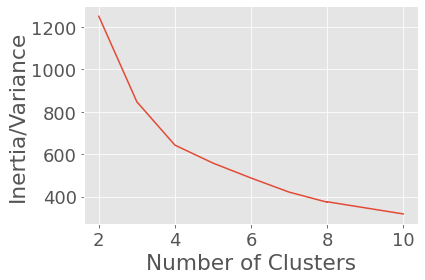

In [ ]:
#elbow plot 
fig, ax = plt.subplots()
pl.plot(range_n_clusters, inertias)
pl.xlabel("Number of Clusters")
pl.ylabel("Inertia/Variance");

In [ ]:
model = cluster.KMeans(n_clusters = 4, random_state=13)
model.fit(pop_standard)

KMeans(n_clusters=4, random_state=13)

In [ ]:
model.labels_[0]

0

In [ ]:
model.cluster_centers_[0]

array([-1.29531414e+00, -1.26621755e+00, -1.23620177e+00, -1.20676402e+00,
       -1.17691033e+00, -1.14714671e+00, -1.11749196e+00, -1.08767271e+00,
       -1.05905358e+00, -1.03051900e+00, -1.00116914e+00, -9.70472742e-01,
       -9.39141187e-01, -9.07596162e-01, -8.76510068e-01, -8.46710151e-01,
       -8.18417531e-01, -7.89895767e-01, -7.59949084e-01, -7.27698656e-01,
       -6.91796807e-01, -6.51682642e-01, -6.07820693e-01, -5.63206732e-01,
       -5.18557552e-01, -4.73401847e-01, -4.29058566e-01, -3.84535294e-01,
       -3.38841574e-01, -2.90570810e-01, -2.37949560e-01, -1.78734822e-01,
       -1.20341890e-01, -6.08227235e-02, -8.48917254e-04,  5.93246118e-02,
        1.19458419e-01,  1.79722719e-01,  2.40827868e-01,  3.03217526e-01,
        3.68397708e-01,  4.36345733e-01,  5.06362908e-01,  5.77669017e-01,
        6.52381026e-01,  7.30676509e-01,  8.12657507e-01,  8.97615050e-01,
        9.85842120e-01,  1.07377293e+00,  1.16123892e+00,  1.25067334e+00,
        1.34068434e+00,  

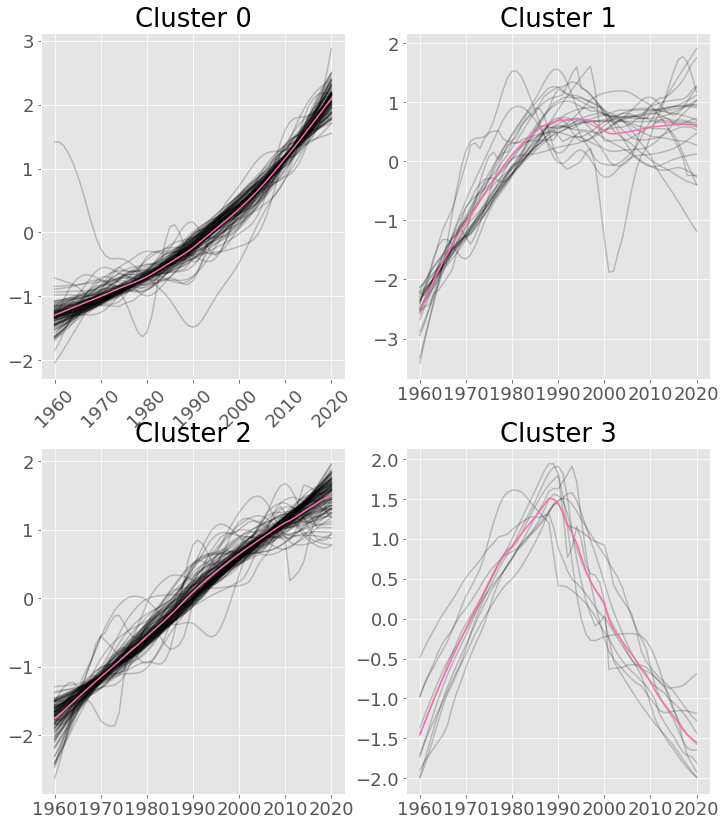

In [ ]:
fig,ax = pl.subplots(2,2, figsize=(12,14))

ax[0,0].set_title("Cluster 0")
ax[0,0].set_xticks(range(0,70,10))
ax[0,0].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)],
                        rotation=45);
ax[0,0].plot(pop_standard[model.labels_ == 0].T, "k", alpha=0.2);
ax[0,0].plot(model.cluster_centers_[0], color="hotpink")

ax[0,1].set_title("Cluster 1")
ax[0,1].set_xticks(range(0,70,10))
ax[0,1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[0,1].plot(pop_standard[model.labels_ == 1].T, "k", alpha=0.2);

ax[0,1].plot(model.cluster_centers_[1], color="hotpink")


ax[1,0].set_title("Cluster 2")
ax[1,0].set_xticks(range(0,70,10))
ax[1,0].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[1,0].plot(pop_standard[model.labels_ == 2].T, "k", alpha=0.2);

ax[1,0].plot(model.cluster_centers_[2], color="hotpink")


ax[1,1].set_title("Cluster 3")
ax[1,1].set_xticks(range(0,70,10))
ax[1,1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[1,1].plot(pop_standard[model.labels_ == 3].T, "k", alpha=0.2);

ax[1,1].plot(model.cluster_centers_[3], color="hotpink")


Now that we can see the center of each cluster we are going to try to find out which country those are!

In [ ]:
#had a hard time with this one, given I can only see 100 counries at a time and there are 112 in this cluster
pop_df_clean[model.labels_==0]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,117468741.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,5803677.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uganda,6767092.0,6983824.0,7215799.0,7461636.0,7719108.0,7986062.0,8263434.0,8550444.0,8841156.0,9127855.0,...,33476772.0,34558700.0,35694519.0,36911530.0,38225447.0,39649173.0,41166588.0,42729032.0,44269587.0,45741000.0
British Virgin Islands,8053.0,8164.0,8319.0,8469.0,8644.0,8836.0,9022.0,9213.0,9427.0,9621.0,...,28326.0,28654.0,28850.0,28985.0,29148.0,29355.0,29567.0,29795.0,30033.0,30237.0
Vanuatu,63689.0,65700.0,67793.0,69944.0,72116.0,74268.0,76392.0,78505.0,80653.0,82920.0,...,242658.0,249505.0,256637.0,263888.0,271128.0,278326.0,285499.0,292675.0,299882.0,307150.0


In [ ]:
pop_df_clean[model.labels_==1]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0
Armenia,1874119.0,1941498.0,2009524.0,2077584.0,2145004.0,2211316.0,2276038.0,2339133.0,2401142.0,2462938.0,...,2876536.0,2884239.0,2897593.0,2912403.0,2925559.0,2936147.0,2944789.0,2951741.0,2957728.0,2963234.0
Belarus,8198000.0,8271216.0,8351928.0,8437232.0,8524224.0,8610000.0,8696496.0,8785648.0,8874552.0,8960304.0,...,9461643.0,9446836.0,9443211.0,9448515.0,9461076.0,9469379.0,9458989.0,9438785.0,9419758.0,9379952.0
Central Europe and the Baltics,91401764.0,92232738.0,93009498.0,93840016.0,94715795.0,95440988.0,96146336.0,97043270.0,97884022.0,98606630.0,...,104174038.0,103935318.0,103713726.0,103496179.0,103257886.0,102994278.0,102740078.0,102538451.0,102398537.0,102253057.0
Curacao,124826.0,126125.0,128414.0,130860.0,133148.0,135266.0,136682.0,138140.0,140298.0,142581.0,...,150831.0,152088.0,153822.0,155909.0,157980.0,159664.0,160175.0,159336.0,157441.0,155014.0
Czech Republic,9602006.0,9586651.0,9624660.0,9670685.0,9727804.0,9779358.0,9821040.0,9852899.0,9876346.0,9896580.0,...,10496088.0,10510785.0,10514272.0,10525347.0,10546059.0,10566332.0,10594438.0,10629928.0,10671870.0,10698896.0
Dominica,60020.0,61036.0,61978.0,62917.0,63921.0,65044.0,66300.0,67687.0,69034.0,70214.0,...,70912.0,70954.0,71019.0,71091.0,71175.0,71307.0,71460.0,71626.0,71808.0,71991.0
Faroe Islands,34624.0,35074.0,35521.0,35965.0,36409.0,36843.0,37283.0,37705.0,38131.0,38560.0,...,47815.0,47843.0,47901.0,47965.0,48055.0,48173.0,48326.0,48497.0,48677.0,48865.0
Greenland,32500.0,33700.0,35000.0,36400.0,37600.0,39200.0,40500.0,41900.0,43400.0,44900.0,...,56890.0,56810.0,56483.0,56295.0,56114.0,56186.0,56172.0,56023.0,56225.0,56367.0


In [ ]:
pop_df_clean[model.labels_==2]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Andorra,1.341000e+04,1.437800e+04,1.537900e+04,1.640700e+04,1.746600e+04,1.854200e+04,1.964600e+04,2.076000e+04,2.188600e+04,2.305300e+04,...,8.374800e+04,8.242700e+04,8.077000e+04,7.921300e+04,7.799300e+04,7.729500e+04,7.699700e+04,7.700800e+04,7.714600e+04,7.726500e+04
Argentina,2.048178e+07,2.081727e+07,2.115304e+07,2.148892e+07,2.182443e+07,2.215964e+07,2.249403e+07,2.282887e+07,2.316827e+07,2.351761e+07,...,4.126149e+07,4.173327e+07,4.220294e+07,4.266950e+07,4.313197e+07,4.359037e+07,4.404481e+07,4.449450e+07,4.493871e+07,4.537676e+07
American Samoa,2.012700e+04,2.060500e+04,2.124600e+04,2.202900e+04,2.285000e+04,2.367500e+04,2.447300e+04,2.523500e+04,2.598000e+04,2.669800e+04,...,5.575500e+04,5.566900e+04,5.571700e+04,5.579100e+04,5.580600e+04,5.573900e+04,5.561700e+04,5.546100e+04,5.531200e+04,5.519700e+04
Azerbaijan,3.895398e+06,4.030325e+06,4.171428e+06,4.315127e+06,4.456691e+06,4.592601e+06,4.721528e+06,4.843872e+06,4.960237e+06,5.071930e+06,...,9.173082e+06,9.295784e+06,9.416801e+06,9.535079e+06,9.649341e+06,9.757812e+06,9.854033e+06,9.939771e+06,1.002428e+07,1.009312e+07
Bangladesh,4.801350e+07,4.936283e+07,5.075215e+07,5.220201e+07,5.374172e+07,5.538511e+07,5.715765e+07,5.903425e+07,6.091845e+07,6.267976e+07,...,1.492731e+08,1.510057e+08,1.527614e+08,1.545174e+08,1.562563e+08,1.579772e+08,1.596854e+08,1.613767e+08,1.630462e+08,1.646894e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,3.267005e+07,3.366611e+07,3.468341e+07,3.572121e+07,3.678000e+07,3.785895e+07,3.895805e+07,4.007295e+07,4.119359e+07,4.230715e+07,...,8.887138e+07,8.980193e+07,9.075259e+07,9.171385e+07,9.267708e+07,9.364044e+07,9.460064e+07,9.554596e+07,9.646211e+07,9.733858e+07
World,3.032156e+09,3.071596e+09,3.124561e+09,3.189656e+09,3.255146e+09,3.322047e+09,3.392098e+09,3.461620e+09,3.532783e+09,3.606554e+09,...,7.003760e+09,7.089255e+09,7.175500e+09,7.261847e+09,7.347679e+09,7.433569e+09,7.519183e+09,7.602454e+09,7.683372e+09,7.761620e+09
Samoa,1.086270e+05,1.121120e+05,1.157680e+05,1.195520e+05,1.233460e+05,1.270550e+05,1.306720e+05,1.341810e+05,1.374840e+05,1.404950e+05,...,1.874690e+05,1.890890e+05,1.907120e+05,1.922200e+05,1.935100e+05,1.945400e+05,1.953580e+05,1.961280e+05,1.970930e+05,1.984100e+05


In [ ]:
#I believe that the central country here is Latvia, this cluster contains the Baltic states, some balkins and, former Austro-Hungarian and USSR countries. 
#It makes sense that Latvia, Lithuania, and Ukraine would follow a similar path 
#Interstingly, Estonia has a very different path
pop_df_clean[model.labels_==3]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Bulgaria,7867374.0,7943118.0,8012946.0,8078145.0,8144340.0,8204168.0,8258057.0,8310226.0,8369603.0,8434172.0,...,7348328.0,7305888.0,7265115.0,7223938.0,7177991.0,7127822.0,7075947.0,7025037.0,6975761.0,6934015.0
Bosnia and Herzegovina,3225664.0,3288604.0,3353228.0,3417573.0,3478999.0,3535632.0,3586630.0,3632678.0,3675448.0,3717476.0,...,3661173.0,3604972.0,3542598.0,3482106.0,3429362.0,3386263.0,3351534.0,3323929.0,3300998.0,3280815.0
Estonia,1211537.0,1225077.0,1241623.0,1258857.0,1277086.0,1294566.0,1308597.0,1318946.0,1331214.0,1345249.0,...,1327439.0,1322696.0,1317997.0,1314545.0,1315407.0,1315790.0,1317384.0,1321977.0,1326898.0,1331057.0
Georgia,3645600.0,3703600.0,3760300.0,3816100.0,3870300.0,3921600.0,3966700.0,4005800.0,4042300.0,4080300.0,...,3756441.0,3728874.0,3717668.0,3719414.0,3725276.0,3727505.0,3728004.0,3726549.0,3720161.0,3714000.0
Croatia,4140181.0,4167292.0,4196712.0,4225675.0,4252876.0,4280923.0,4310701.0,4338683.0,4365628.0,4391490.0,...,4280622.0,4267558.0,4255689.0,4238389.0,4203604.0,4174349.0,4124531.0,4087843.0,4065253.0,4047200.0
Hungary,9983967.0,10029321.0,10061734.0,10087947.0,10119835.0,10147935.0,10178653.0,10216604.0,10255815.0,10298723.0,...,9971727.0,9920362.0,9893082.0,9866468.0,9843028.0,9814023.0,9787966.0,9775564.0,9771141.0,9749763.0
Lithuania,2778550.0,2823550.0,2863350.0,2898950.0,2935200.0,2971450.0,3008050.0,3044400.0,3078850.0,3107321.0,...,3028115.0,2987773.0,2957689.0,2932367.0,2904910.0,2868231.0,2828403.0,2801543.0,2794137.0,2794700.0
Latvia,2120979.0,2152681.0,2181586.0,2210919.0,2240623.0,2265919.0,2283217.0,2301220.0,2323619.0,2343173.0,...,2059709.0,2034319.0,2012647.0,1993782.0,1977527.0,1959537.0,1942248.0,1927174.0,1913822.0,1901548.0
Romania,18406905.0,18555250.0,18676550.0,18797850.0,18919126.0,19031576.0,19215450.0,19534242.0,19799831.0,20009141.0,...,20147528.0,20058035.0,19983693.0,19908979.0,19815616.0,19702267.0,19588715.0,19473970.0,19371648.0,19286123.0


 I separated them because I couldn't get the legend to not cover a portion of the graph
 I got the central line to be pink, I'm not sure how to get the legend to match tho.

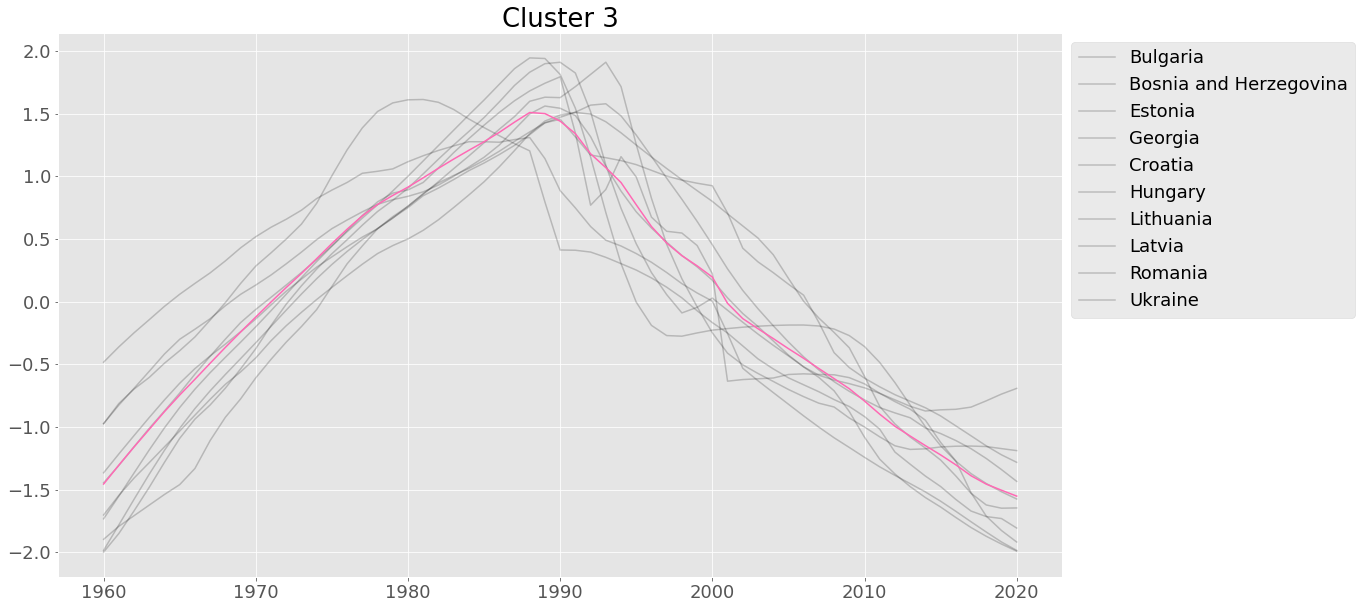

In [ ]:
#Again from research I believe that the middle country here is Latvia
#Many of these countries share a similar history and it would make sense they would share a similar history of population growth over time. Being former soviet block countries. 

fig,ax = pl.subplots(1, figsize=(18,10))

ax.set_title("Cluster 3")
ax.set_xticks(range(0,70,10))
ax.set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax.plot(pop_standard[model.labels_ == 3].T, "k", alpha=0.2);
ax.legend(labels=pop_df_clean.loc[model.labels_ == 3].index, bbox_to_anchor=(1.0, 1.0), loc='upper left')

#ax.plot(model.cluster_centers_[3], color="hotpink")

ax.plot(model.cluster_centers_[3], color="hotpink")



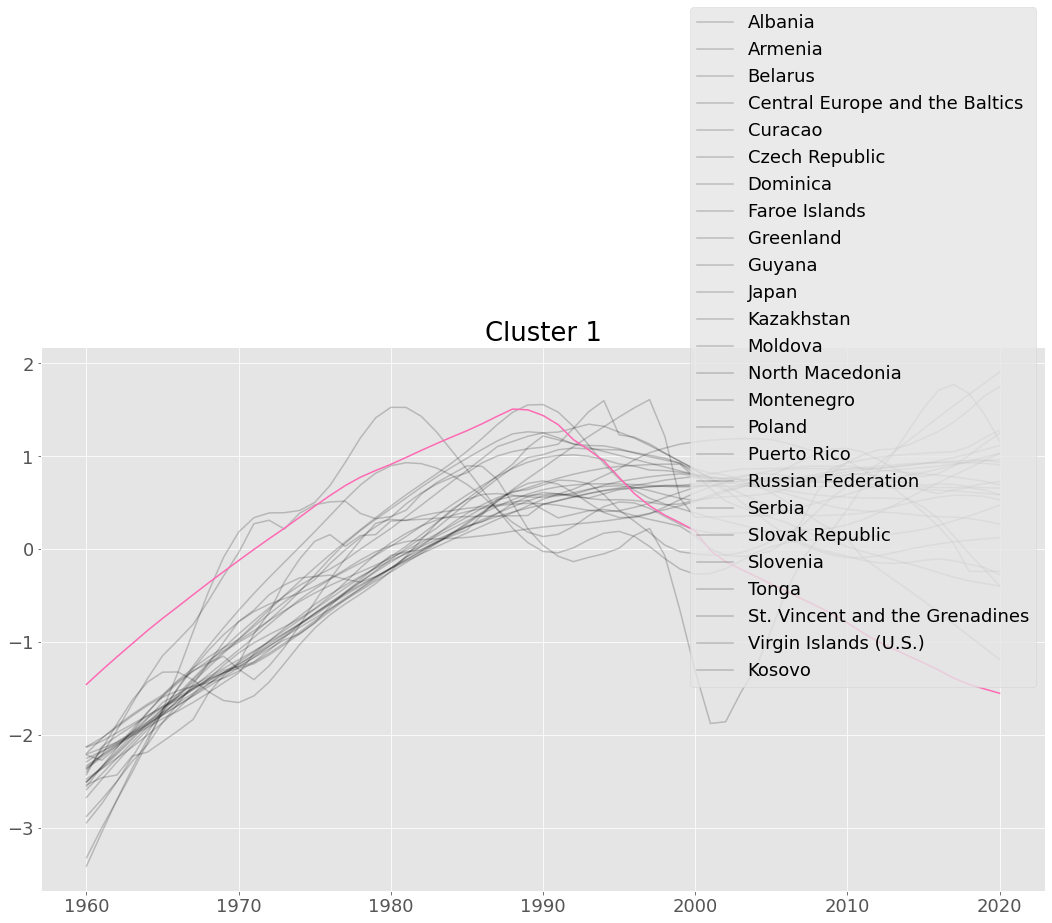

In [ ]:
#This one is a little more varied I think within this cluster we can see geographical 'blocks' of countries.
#I believe these countries are grouped together because they have not had any wars since the 60's (obviously this data does not cover the current war Russia is waging against Ukraine)
#It's interesting that Japan is in here, they suffered heavy losses after WWII and have had a notoriously low birth rate, so in some respects that does make sense
#I think the center one is Eastern Europe and the Baltics
#I still don't know how to do colors :(


fig,ax = pl.subplots(1, figsize=(18,10))

ax.set_title("Cluster 1")
ax.set_xticks(range(0,70,10))
ax.set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax.plot(pop_standard[model.labels_ == 1].T, "k", alpha=0.2,);
ax.legend(labels=pop_df_clean.loc[model.labels_ == 1].index, bbox_to_anchor=(1.0, 1.0), loc='right')

ax.plot(model.cluster_centers_[3], color="hotpink")

